# Práctica Machine Learning

Objetivo: Predecir el precio del airbnb utilizando los datos del dataset airbnb-listings-extract.csv

In [1]:
# Importamos las librerias necesarias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carga de los datos
data = pd.read_csv('airbnb-listings-extract.csv', sep=';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


### Observaciones
A simple vista vemos que tenemos variables que contienen URLs, fechas, free text y más datos que pueden no interesarnos, así como valores nulos.
Vamos a hacer una primera exploración de los datos para eliminar aquellas variables que no nos aportan información relevante para nuestro modelo.

## Exploración prévia a la separación train/test

In [171]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [5]:
first_clean = []

# Cogemos las columnas que contienen Urls
for col in data.columns:
    if 'Url' in col:
        first_clean.append(col)

#Cogemos las columnas que contienen información del Host
for col in data.columns:
    if 'Host' in col:
        first_clean.append(col)

for col in data.columns:
    if 'ID' in col:
        first_clean.append(col)

print("Primeras columnas a eliminar: ", first_clean)

Primeras columnas a eliminar:  ['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'ID', 'Scrape ID', 'Host ID']


In [7]:
# Eliminamos el primer grupo de columnas (IDs y Host info)
data = data.drop(first_clean, axis=1)

In [9]:
# Filtramos las columnas object para ver las que contienen texto libre
print(data.select_dtypes(include=['object']).head(1).T)

                                                                              0
Last Scraped                                                         2017-03-07
Name                                             The Loft-Full Bath-Deck w/View
Summary                       Loft in the Hill country 12-15 minutes directl...
Space                         This loft has a spectacular view of the hills ...
Description                   Loft in the Hill country 12-15 minutes directl...
Experiences Offered                                                        none
Neighborhood Overview         This neighborhood is located in the hills west...
Notes                         The loft is located on a gated property.  Ther...
Transit                       There is no public transportation from this lo...
Access                        The loft is entirely private to the guest as i...
Interaction                   My wife and I live on the property so we would...
House Rules                   The loft i

In [179]:
print(data.select_dtypes(include=['object']).columns.tolist())

['Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features']


In [11]:
# Eliminamos las columnas que contienen texto libre y fechas.
data = data.drop(['Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
                'House Rules', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'Features'], axis=1)

In [552]:
# Vamos a mirar la cantidad de nulos que tienen las variables para así terminar con la exploración prévia

null_percentage = data.isnull().mean() * 100 # hacemos la media del booleano isnull y multiplicamos por 100 para conseguir el %
null_percentage_noZero = null_percentage[null_percentage != 0] # buscamos todas las variables que contengan algun nulo
null_percentage_noZero = null_percentage_noZero.round(2) # redondeamos los decimales
half_null = null_percentage[null_percentage > 50].index # filtramos las columnas que contienen mas del 50% de nulos

print(f'Columnas con mas del 50% de nulos: {list(half_null)}')
print(f'Porcentajes de nulos en columna:\n{null_percentage_noZero}')

Columnas con mas del 50% de nulos: ['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'License', 'Jurisdiction Names']
Porcentajes de nulos en columna:
Neighbourhood                     35.38
Neighbourhood Group Cleansed       6.90
City                               0.04
State                              0.97
Zipcode                            3.42
Market                             0.39
Country                            0.01
Bathrooms                          0.37
Bedrooms                           0.17
Beds                               0.33
Amenities                          1.15
Square Feet                       95.95
Price                              0.12
Weekly Price                      75.71
Monthly Price                     75.91
Security Deposit                  57.67
Cleaning Fee                      41.22
Review Scores Rating              22.35
Review Scores Accuracy            22.50
Review Scores Cleanliness         22.46
Review Scores Checkin         

In [13]:
# Eliminamos las variables con mas del 50% de nulos 
data = data.drop(['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'License', 'Jurisdiction Names'], axis=1)

In [187]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,14780.0,40.497626,4.641387,-37.851182,40.409726,40.419466,40.430916,55.966912
Longitude,14780.0,-3.858041,14.123146,-123.131344,-3.707604,-3.700785,-3.684057,153.371427
Accommodates,14780.0,3.277808,2.097291,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,14725.0,1.281732,0.658517,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,14755.0,1.343816,0.900078,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,14731.0,2.044260,1.612770,1.000000,1.000000,2.000000,2.000000,16.000000
Price,14763.0,73.561471,72.062050,9.000000,34.000000,55.000000,86.000000,999.000000
Cleaning Fee,8687.0,31.805341,30.878599,0.000000,15.000000,25.000000,40.000000,662.000000
Guests Included,14780.0,1.589986,1.182550,0.000000,1.000000,1.000000,2.000000,16.000000
Extra People,14780.0,7.690460,12.971352,0.000000,0.000000,0.000000,15.000000,500.000000


### Observaciones

Hemos empezado el dataset con 89 columnas, de las cuales hemos eliminado 45.
Me llaman la atención que el número máximo de **extra people** sea **500** personas así que tendremos que hacer una buena revisión de outliers
ya que 500 personas son los habitantes que tiene mi pueblo, literal, así que dudo que una sola casa pueda hospedar a tanta gente. 
A parte tampoco me cuadran mucho las medias con los valores máximos de ciertas variables, así que outliers, outliers everywhere.

## División train/test usando train_test_split

In [556]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [558]:
from sklearn.model_selection import train_test_split

# lo primero que hacemos es separar la variable objetivo de las variables independientes
X = data.drop(['Price'], axis=1) # Todas las variables menos Price
y = data['Price'] # Price

train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./dairbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
data = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 44)
Dimensiones del dataset de test: (2956, 44)


## Análisis exploratorio con los datos ya separados


In [191]:
data.dtypes.value_counts()

object     18
float64    16
int64      10
Name: count, dtype: int64

In [193]:
data.isnull().sum()

Experiences Offered                  0
Street                               0
Neighbourhood                     4159
Neighbourhood Cleansed               0
Neighbourhood Group Cleansed       818
City                                 4
State                              119
Zipcode                            398
Market                              44
Smart Location                       0
Country Code                         0
Country                              1
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           44
Bedrooms                            20
Beds                                37
Bed Type                             0
Amenities                          141
Price                               15
Cleaning Fee                      4850
Guests Included                      0
Extra People             

In [195]:
data.select_dtypes(include=['float64', 'int64']).isnull().sum()

Latitude                             0
Longitude                            0
Accommodates                         0
Bathrooms                           44
Bedrooms                            20
Beds                                37
Price                               15
Cleaning Fee                      4850
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Availability 30                      0
Availability 60                      0
Availability 90                      0
Availability 365                     0
Number of Reviews                    0
Review Scores Rating              2661
Review Scores Accuracy            2681
Review Scores Cleanliness         2676
Review Scores Checkin             2688
Review Scores Communication       2677
Review Scores Location            2691
Review Scores Value               2692
Calculated host listings count       4
Reviews per Month        

In [197]:
data.select_dtypes(include=['object']).isnull().sum()

Experiences Offered                0
Street                             0
Neighbourhood                   4159
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     818
City                               4
State                            119
Zipcode                          398
Market                            44
Smart Location                     0
Country Code                       0
Country                            1
Property Type                      0
Room Type                          0
Bed Type                           0
Amenities                        141
Cancellation Policy                0
Geolocation                        0
dtype: int64

## Imputación de variables numéricas


In [562]:
# Vamos a hacer imputación de datos, vemos que tenemos muchas variables que contien nulos y esto hay que solucionarlo antes de proceder
# Vamos a hacer la imputación con un bucle usando la MODA

num_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace = True)

print("Valores nulos después de la imputación con moda:")
print(data.select_dtypes(include=['float64', 'int64']).isnull().sum())


Valores nulos después de la imputación con moda:
Latitude                          0
Longitude                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Price                             0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review Scores Value               0
Calculated host listings count    0
Reviews per Month                 0
dtype: int64


## Imputación de variables categóricas



In [566]:
# En este caso pensaba usar también la moda pero me doy cuenta de que tenemos variables como Neighbourhood en donde no va a ser buena idea
# Hacer la moda, ya que quizás la moda se Madrid pero los nulos no, así que sesgaría mucho los datos. 
# He intentado obtener los datos nulos a partir de las coordenadas, pero me ha petado la API y el tiempo de respuesta era... bueno, muy largo.
# Así que volvemos a estar en el mismo punto.


data['Amenities'].fillna(data['Amenities'].mode()[0], inplace=True)
data.select_dtypes(include=['object']).isnull().sum()


Experiences Offered                0
Street                             0
Neighbourhood                   4159
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     818
City                               4
State                            119
Zipcode                          398
Market                            44
Smart Location                     0
Country Code                       0
Country                            1
Property Type                      0
Room Type                          0
Bed Type                           0
Amenities                          0
Cancellation Policy                0
Geolocation                        0
dtype: int64

In [568]:
# Viendo que Country contiene 1 valor nulo pero tenemos Country Code, voy a eliminar Country 

data= data.drop('Country', axis=1)

In [570]:
data.select_dtypes(include=['object']).isnull().sum()

Experiences Offered                0
Street                             0
Neighbourhood                   4159
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     818
City                               4
State                            119
Zipcode                          398
Market                            44
Smart Location                     0
Country Code                       0
Property Type                      0
Room Type                          0
Bed Type                           0
Amenities                          0
Cancellation Policy                0
Geolocation                        0
dtype: int64

In [401]:
print(data['Street'].head(5))
print(data['Neighbourhood'].value_counts())
print(data['Neighbourhood Cleansed'].value_counts())
print(data['Neighbourhood Group Cleansed'].value_counts())

0    Jerónimos, Madrid, Comunidad de Madrid 28014, ...
1             Madrid, Comunidad de Madrid 28012, Spain
2    Carabanchel, Madrid, Comunidad de Madrid 28025...
3             Madrid, Comunidad de Madrid 28012, Spain
4                  Gaztambide, Madrid, 28 28015, Spain
Name: Street, dtype: object
Neighbourhood
Malasaña             693
La Latina            649
Embajadores          638
Sol                  592
Cortes               459
                    ... 
Neubau                 1
Beguinage-Dixmude      1
North Beacon Hill      1
Brentwood              1
Gràcia                 1
Name: count, Length: 351, dtype: int64
Neighbourhood Cleansed
Embajadores                 1482
Universidad                 1060
Palacio                      882
Sol                          773
Justicia                     633
                            ... 
nördliche Luisenstadt          1
Westerpark                     1
Neubau                         1
Prenzlauer Berg Nordwest       1
Beverly Hills   

In [572]:
# Vale, decido quedarme con la variable Street ya que contiene la información del barrio y del país. Así me ahorro los nulos de las otras variables
# ¿Me va a traer problemas? Seguramente, pero de perdidos al río

data = data.drop(['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Smart Location', 
                  'Geolocation'], axis=1)

In [405]:
data.select_dtypes(include=['object']).isnull().sum()

Experiences Offered     0
Street                  0
Market                 44
Country Code            0
Property Type           0
Room Type               0
Bed Type                0
Amenities               0
Cancellation Policy     0
dtype: int64

In [407]:
# Vamos a ver que es Market
print(data['Market'].value_counts())

Market
Madrid                   10621
Mallorca Island            300
Barcelona                  235
London                     113
Paris                       88
New York                    53
Rome                        49
Los Angeles                 37
Dublin                      34
Berlin                      33
Sydney                      29
Vienna                      26
Amsterdam                   19
Copenhagen                  13
Toronto                     13
Brussels                    13
Venice                      12
Other (International)        8
San Francisco                8
Melbourne                    8
Chicago                      8
D.C.                         8
Edinburgh                    7
Seattle                      6
Manchester                   4
New Orleans                  4
Geneva                       4
San Diego                    4
Denver                       3
Austin                       3
Antwerp                      3
Athens                       2
M

In [574]:
# Fuera
data = data.drop('Market', axis = 1)

In [325]:
data.select_dtypes(include=['object']).isnull().sum()

Experiences Offered    0
Street                 0
Country Code           0
Property Type          0
Room Type              0
Bed Type               0
Amenities              0
Cancellation Policy    0
dtype: int64

In [304]:
data.isnull().any()

Experiences Offered               False
Street                            False
Smart Location                    False
Country Code                      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                             False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Availability 30                   False
Availability 60                   False
Availability 90                   False
Availability 365                  False
Number of Reviews                 False


## Codificación variables categóricas
Vamos a usar el Target Encoding ya que tenemos bastantes categorías y pueden estar fuertemente relacionadas con la variable objetivo.

In [307]:
!pip install category_encoders

In [578]:
import pandas as pd
import category_encoders as ce

# Columnas que queremos codificar
categorical_cols = ['Property Type', 'Room Type', 'Experiences Offered', 'Street', 'Country Code', 'Bed Type', 
                    'Amenities', 'Cancellation Policy']  

# TargetEncoder
target_encoder = ce.TargetEncoder(cols=categorical_cols)
data[categorical_cols] = target_encoder.fit_transform(data[categorical_cols], data['Price'])

print(data.head())


   Experiences Offered      Street  Country Code   Latitude  Longitude  \
0            73.576715  111.220821     71.770419  40.407732  -3.684819   
1            73.576715   59.727700     71.770419  40.415802  -3.705340   
2            73.576715   40.345191     71.770419  40.389048  -3.740374   
3            73.576715   59.727700     71.770419  40.412814  -3.703052   
4            73.576715   68.259262     71.770419  40.438631  -3.713716   

   Property Type  Room Type  Accommodates  Bathrooms  Bedrooms  ...  \
0      72.271202  95.020025             4        1.0       1.0  ...   
1      72.271202  95.020025             4        1.0       1.0  ...   
2      72.271202  31.321016             1        1.5       1.0  ...   
3      72.271202  40.898904             2        3.0       1.0  ...   
4      72.271202  40.898904             2        1.0       1.0  ...   

   Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                  95.0                     9.0   

## Matriz de correlación

Price                             1.000000
Amenities                         0.644729
Accommodates                      0.526017
Street                            0.513553
Bedrooms                          0.489327
Cleaning Fee                      0.445881
Beds                              0.435225
Bathrooms                         0.375025
Room Type                         0.371689
Guests Included                   0.294535
Calculated host listings count    0.223933
Country Code                      0.179752
Cancellation Policy               0.164673
Property Type                     0.147655
Availability 30                   0.105940
Review Scores Location            0.098713
Extra People                      0.092211
Review Scores Cleanliness         0.084706
Review Scores Rating              0.080083
Review Scores Accuracy            0.069604
Availability 60                   0.064415
Availability 365                  0.057248
Experiences Offered               0.053693
Review Scor

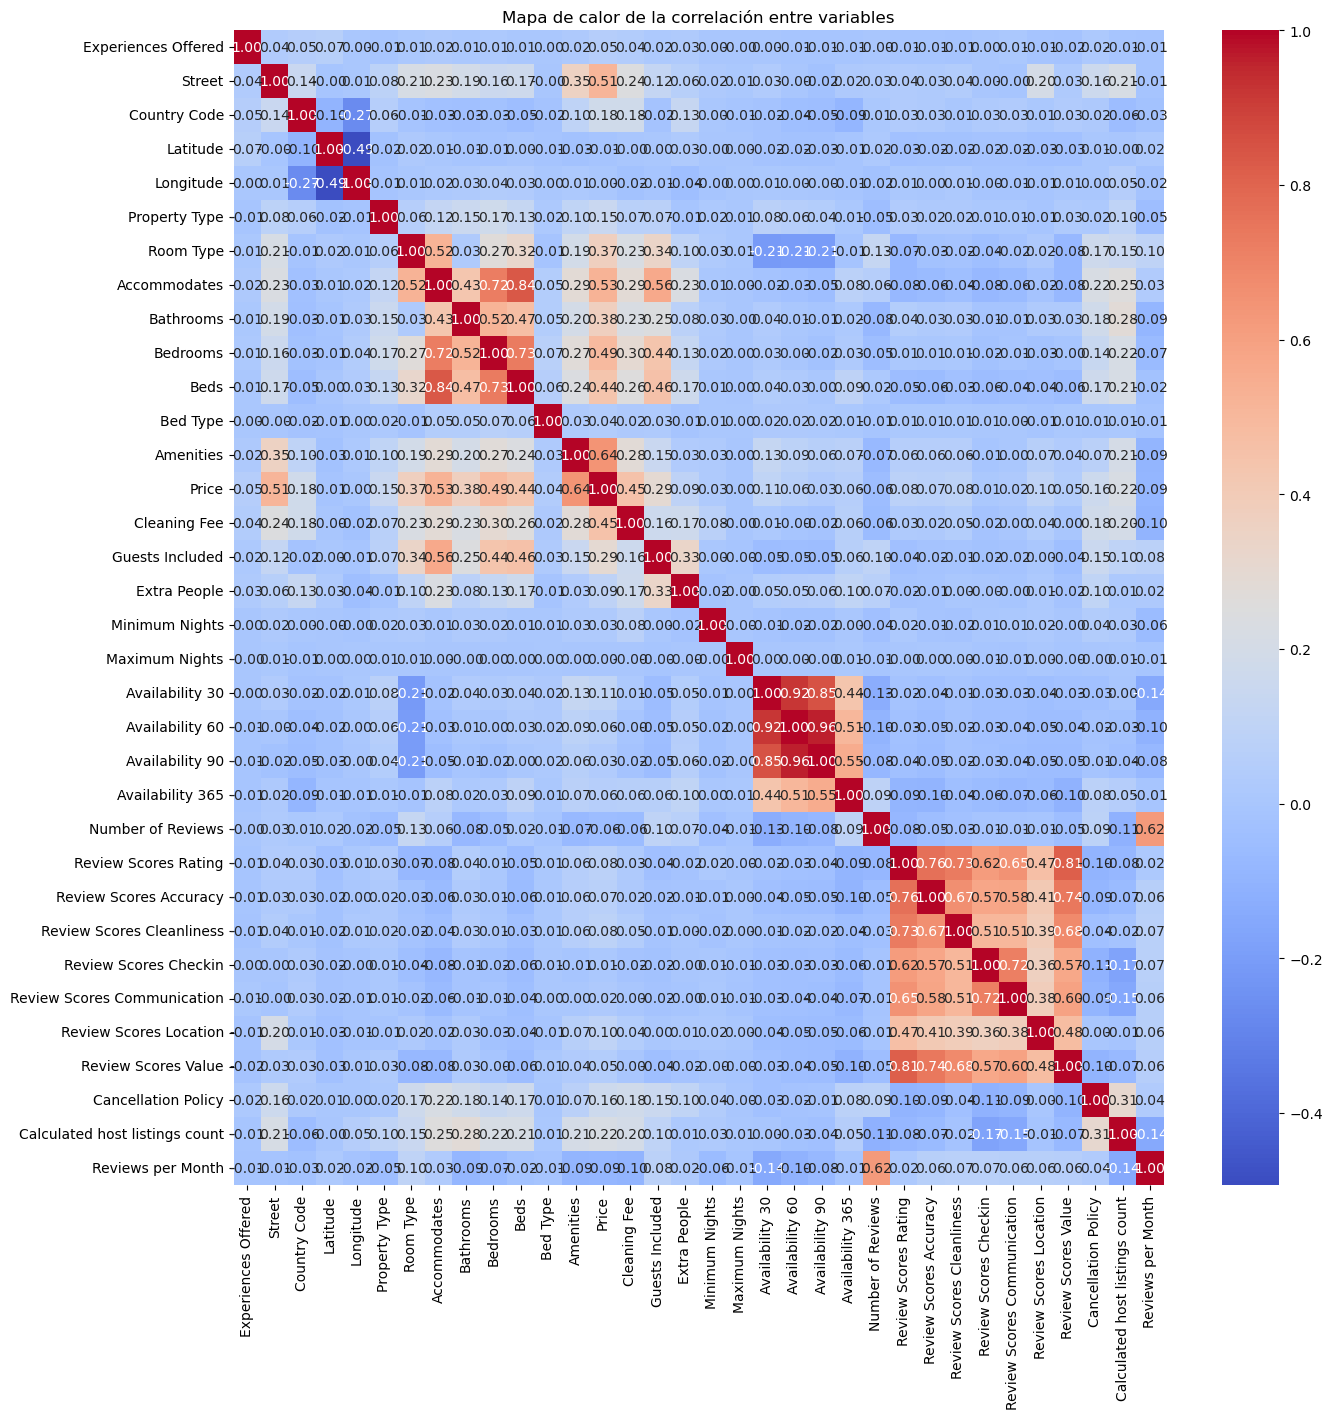

In [582]:
correlation_matrix = data.corr()
# hacemos la correlacion de las variables
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)


plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

Vemos que las variables con **alta correlación** son:
* Amenities
* Accomodates
* Street
* Bedrooms
* Cleaning Fee
* Beds
* Bathrooms

Correlación **moderada**:
* Room Type
* Guests Included
* Calculated host listings count 
* Country code
* Cancellation Policy

Correlación **baja**:
* Availability variables
* Review Scores
* Geographic Coordinates

In [342]:
data.columns

Index(['Experiences Offered', 'Street', 'Country Code', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [586]:
# Decido eliminar las variables con baja correlación
data = data.drop(['Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Latitude',
       'Longitude', 'Maximum Nights', 'Calculated host listings count'], axis =1)

Price                  1.000000
Amenities              0.644729
Accommodates           0.526017
Street                 0.513553
Bedrooms               0.489327
Cleaning Fee           0.445881
Beds                   0.435225
Bathrooms              0.375025
Room Type              0.371689
Guests Included        0.294535
Country Code           0.179752
Cancellation Policy    0.164673
Property Type          0.147655
Extra People           0.092211
Experiences Offered    0.053693
Bed Type               0.037376
Minimum Nights         0.029637
Name: Price, dtype: float64


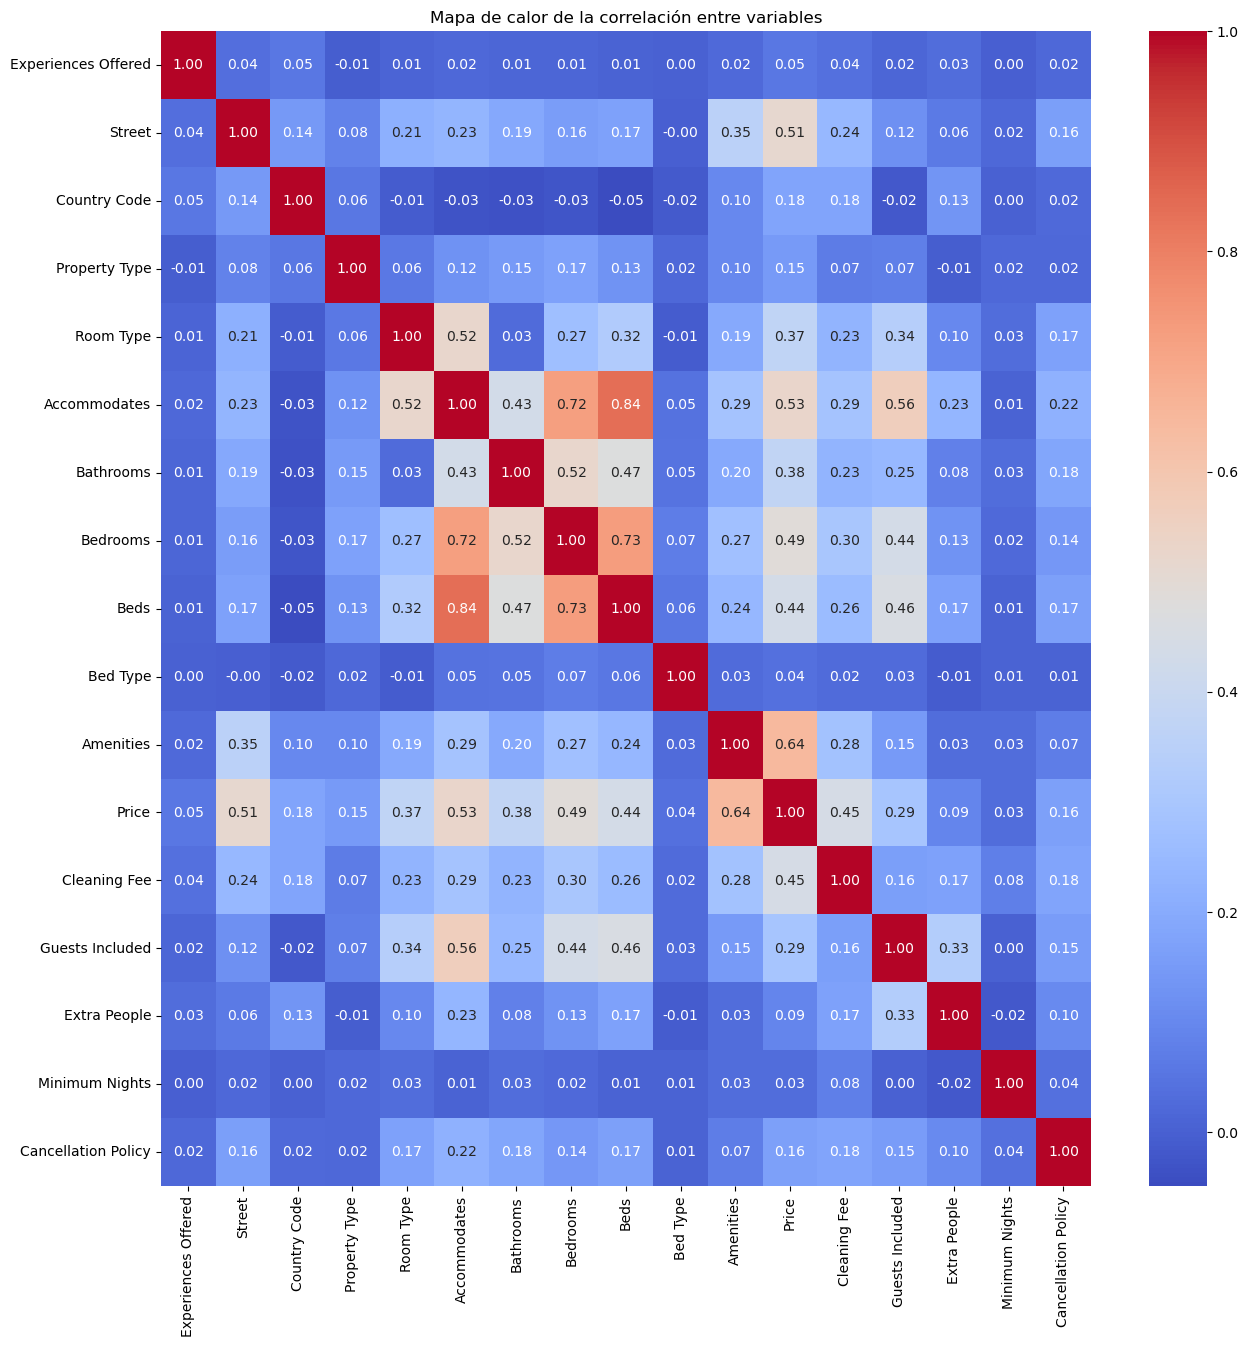

In [588]:
correlation_matrix = data.corr()
# hacemos la correlacion de las variables
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)


plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

In [610]:
data.columns

Index(['Experiences Offered', 'Street', 'Country Code', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Amenities', 'Price', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Cancellation Policy'],
      dtype='object')

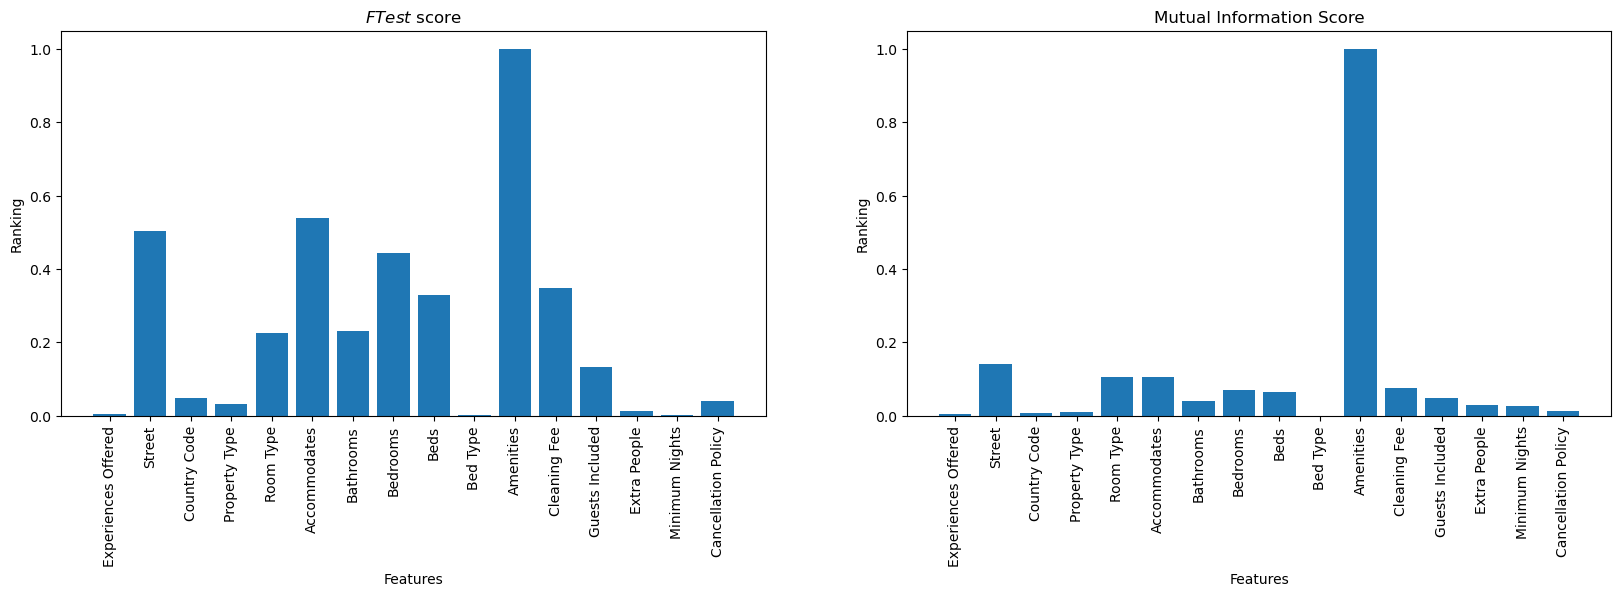

In [614]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# Aseguramos mantener los nombres de las columnas
feature_names = data.columns[data.columns != 'Price']  # Guardamos los nombres de las columnas excepto 'Price'

# Convertimos el DataFrame al formato necesario para scikit-learn
data_values = data.values  # Ahora convertimos a NumPy array

# Definimos y (variable objetivo) y X (variables independientes)
y = data['Price'].values    # Seleccionamos la primera columna ('Price')
X = data.drop(columns=['Price']).values    # Seleccionamos el resto de columnas

# Estudiamos los dos métodos de filtrado
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# Visualización
plt.figure(figsize=(20, 5))

# Gráfico para el F Test
plt.subplot(1,2,1)
plt.bar(range(X.shape[1]), f_test, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

# Gráfico para la información mutua
plt.subplot(1,2,2)
plt.bar(range(X.shape[1]), mi, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Mutual Information Score')

plt.show()


## Visualización


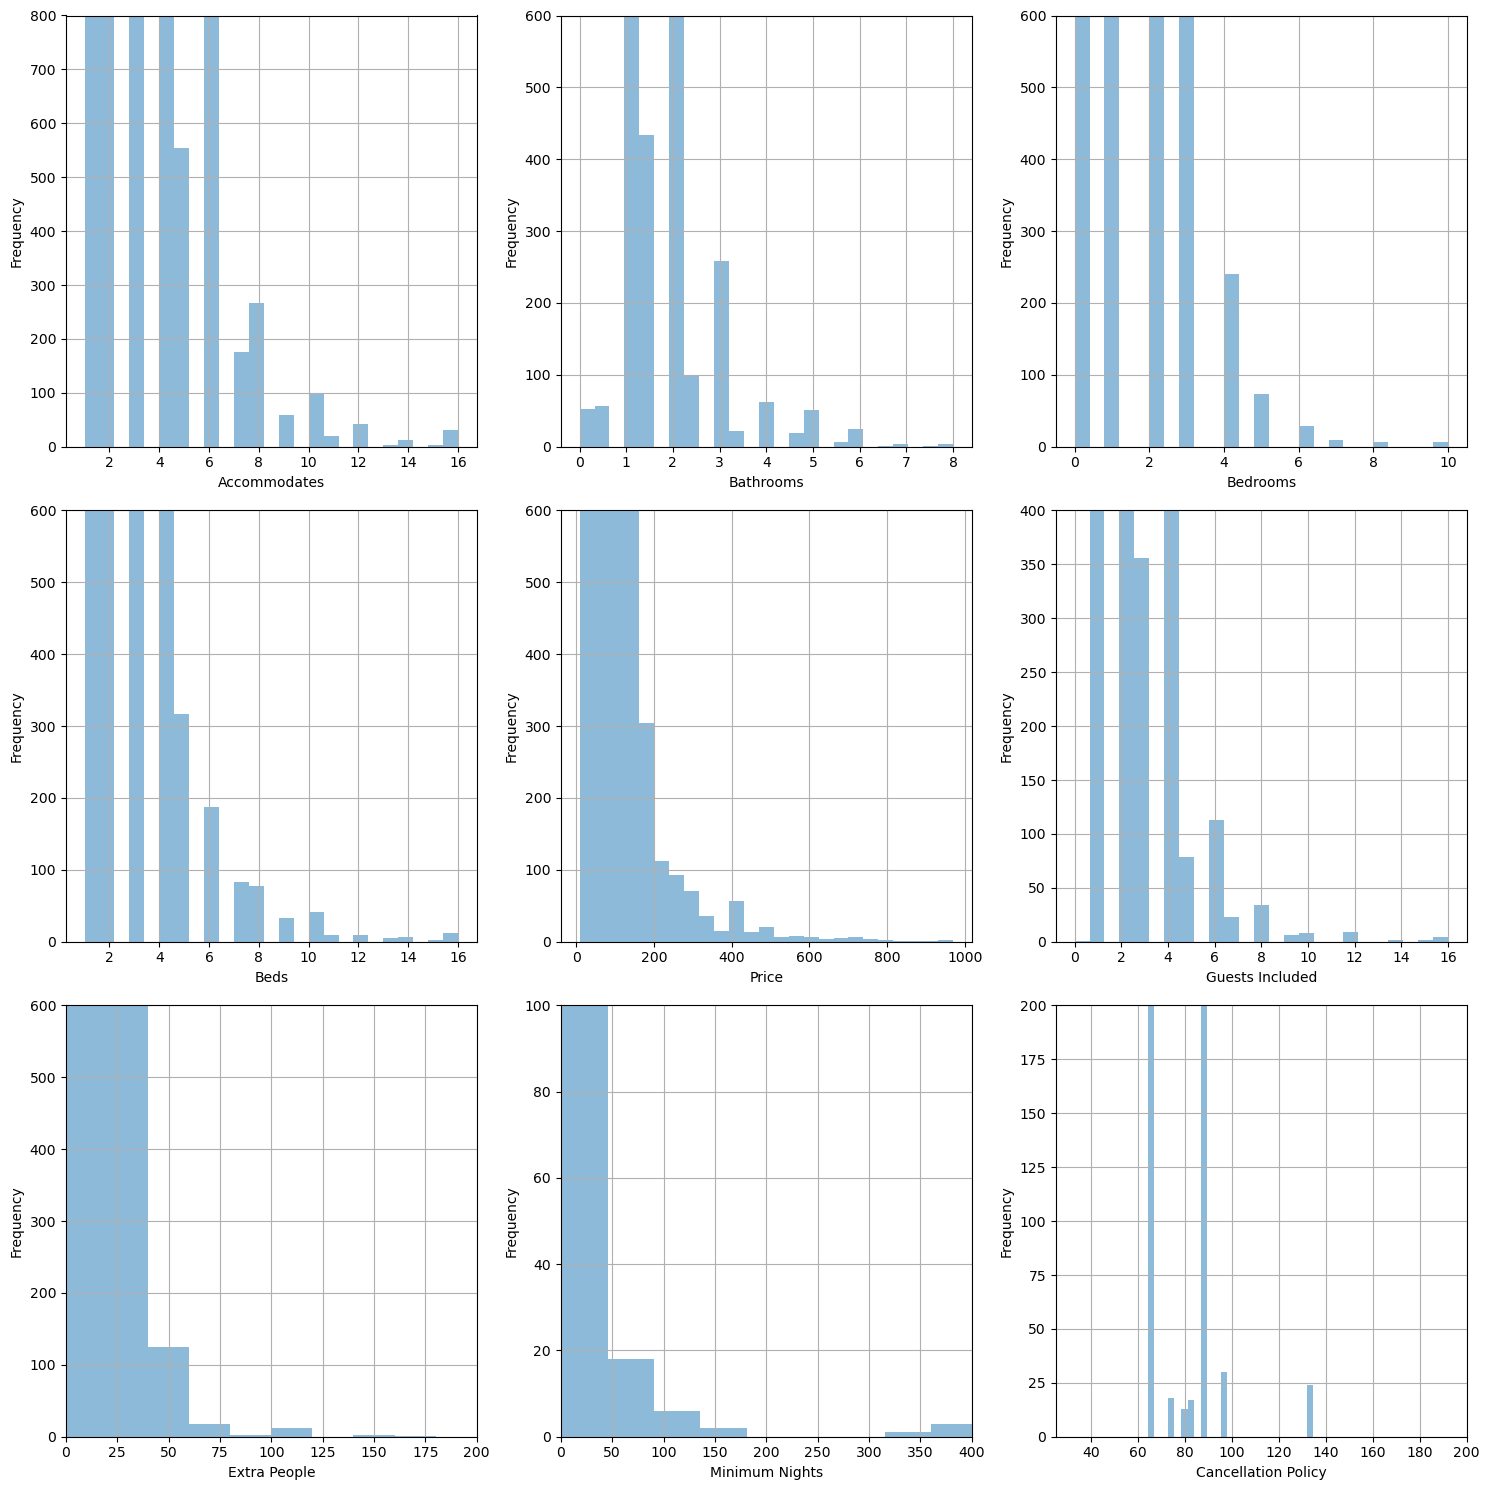

In [655]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))  # Aumentar el tamaño de la figura para mejor visualización

# Primer fila
plt.subplot(3, 3, 1)
data['Accommodates'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 800)
plt.xlabel('Accommodates')

plt.subplot(3, 3, 2)
data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 600)
plt.xlabel('Bathrooms')

plt.subplot(3, 3, 3)
data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 600)
plt.xlabel('Bedrooms')

# Segunda fila
plt.subplot(3, 3, 4)
data['Beds'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 600)
plt.xlabel('Beds')

plt.subplot(3, 3, 5)
data['Price'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 600)
plt.xlabel('Price')

plt.subplot(3, 3, 6)
data['Guests Included'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 400)
plt.xlabel('Guests Included')

# Tercera fila
plt.subplot(3, 3, 7)
data['Extra People'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 600)
plt.xlim(0, 200)
plt.xlabel('Extra People')

plt.subplot(3, 3, 8)
data['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 100)
plt.xlim(0, 400)
plt.xlabel('Minimum Nights')

plt.subplot(3, 3, 9)
data['Cancellation Policy'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 200)
plt.xlim(25, 200)
plt.xlabel('Cancellation Policy')

plt.tight_layout() 
plt.show()


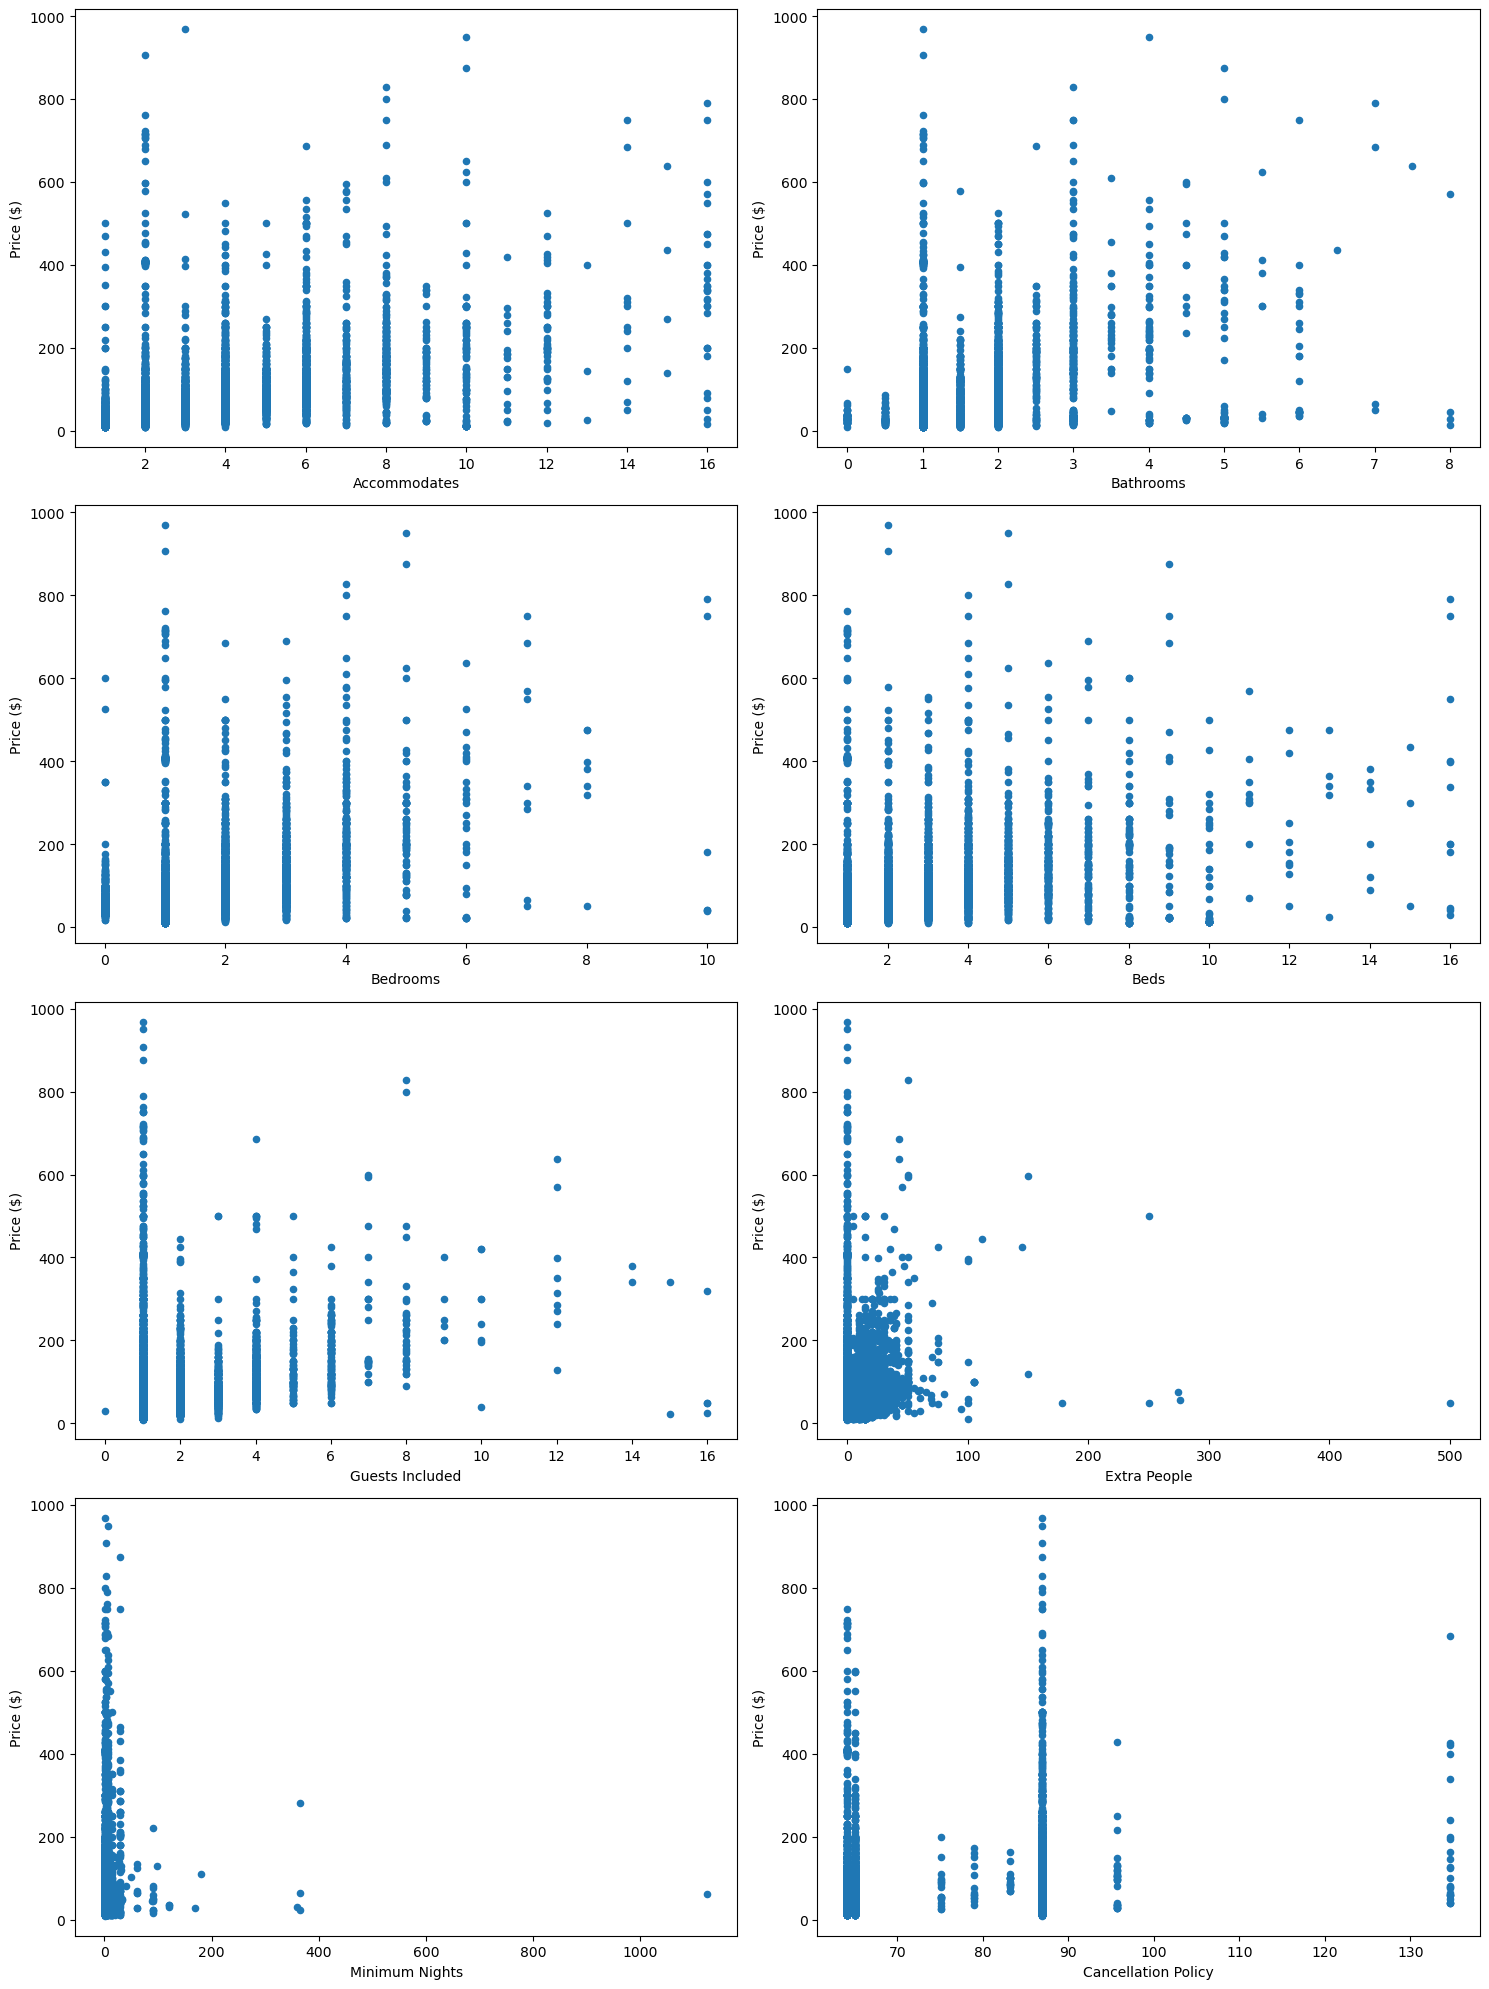

In [616]:
import matplotlib.pyplot as plt

# Lista de variables que quieres graficar contra 'Price'
variables = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 
             'Guests Included', 'Extra People', 'Minimum Nights', 'Cancellation Policy']

# Creamos una figura con una cuadrícula de 4 filas y 2 columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  # Cambiamos el tamaño de la figura si es necesario

# Aplanamos los ejes para facilitar el acceso
axes = axes.flatten()

# Bucle para graficar cada variable en un subplot
for i, var in enumerate(variables):
    data.plot(kind='scatter', x=var, y='Price', ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price ($)')

# Ajustamos el espaciado para evitar superposición de etiquetas
plt.tight_layout()

# Mostramos la figura con todos los gráficos
plt.show()


## Eliminación de outliers

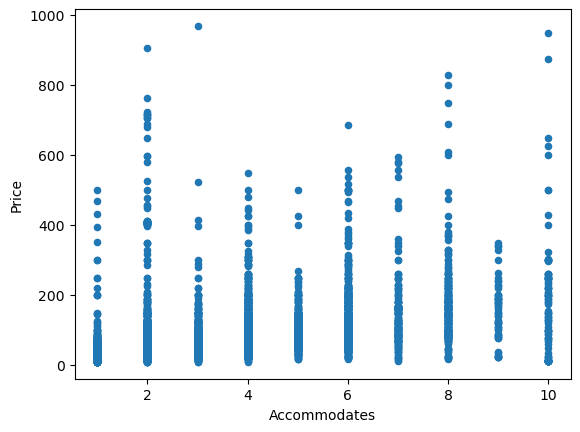

Original: 11824 // Modificado: 11712
Diferencia: 112
Variación: 0.947226%


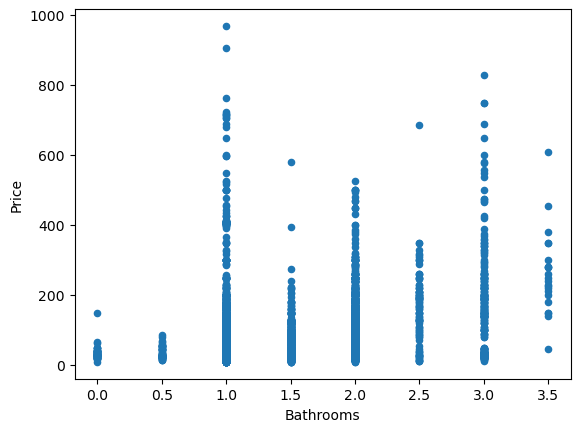

Original: 11824 // Modificado: 11651
Diferencia: 173
Variación: 1.463126%


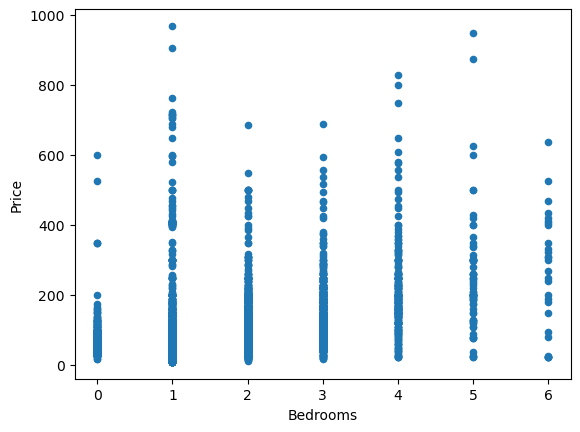

Original: 11824 // Modificado: 11802
Diferencia: 22
Variación: 0.186062%


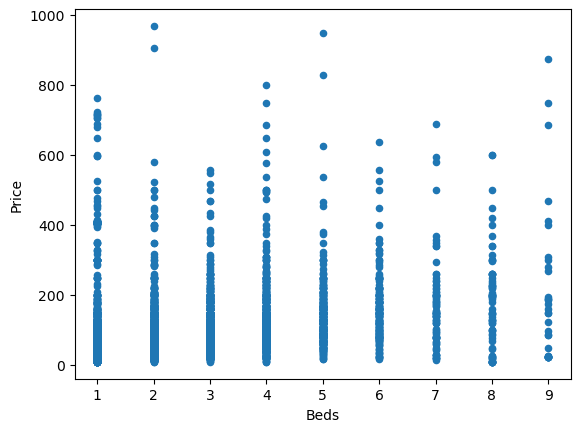

Original: 11824 // Modificado: 11738
Diferencia: 86
Variación: 0.727334%


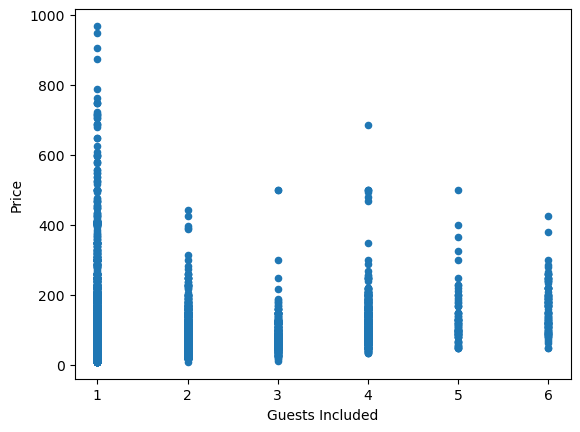

Original: 11824 // Modificado: 11735
Diferencia: 89
Variación: 0.752706%


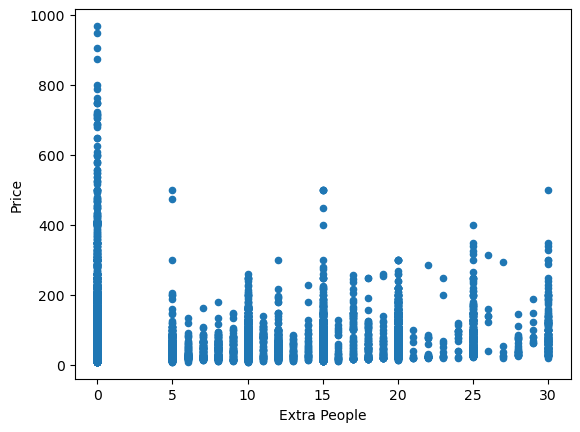

Original: 11824 // Modificado: 11566
Diferencia: 258
Variación: 2.182003%


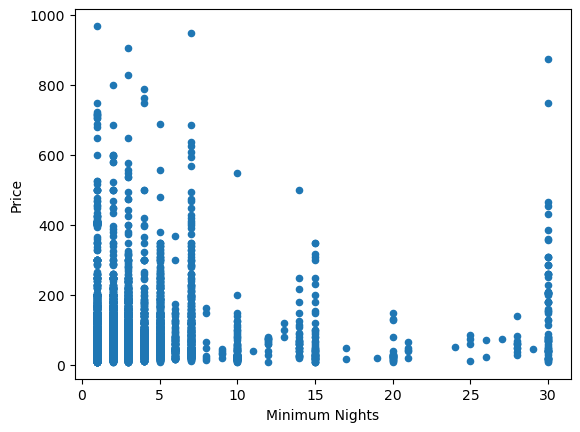

Original: 11824 // Modificado: 11788
Diferencia: 36
Variación: 0.304465%


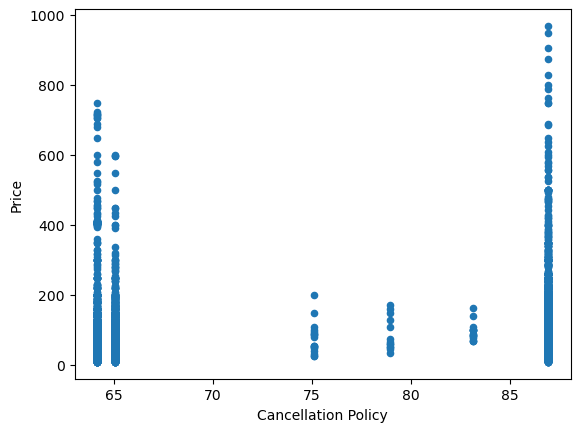

Original: 11824 // Modificado: 11770
Diferencia: 54
Variación: 0.456698%


In [689]:
data_no_outliers_Accommodates = data[data['Accommodates'] <= 10]
data_no_outliers_Accommodates.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Accommodates.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Accommodates.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Accommodates.shape[0])/data.shape[0])*100:2f}%')


data_no_outliers_Bathrooms = data[data['Bathrooms'] <= 3.5]
data_no_outliers_Bathrooms.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Bathrooms.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Bathrooms.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Bathrooms.shape[0])/data.shape[0])*100:2f}%')


data_no_outliers_Bedrooms = data[data['Bedrooms'] <= 6]
data_no_outliers_Bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Bedrooms.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Bedrooms.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Bedrooms.shape[0])/data.shape[0])*100:2f}%')


data_no_outliers_Beds = data[data['Beds'] <= 9]
data_no_outliers_Beds.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Beds.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Beds.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Beds.shape[0])/data.shape[0])*100:2f}%')


data_no_outliers_Guests_Included = data[(data['Guests Included'] <= 6) & (data['Guests Included'] > 0)]
data_no_outliers_Guests_Included.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('Guests Included')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Guests_Included.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Guests_Included.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Guests_Included.shape[0])/data.shape[0])*100:2f}%')


data_no_outliers_Extra_People = data[data['Extra People'] <= 30]
data_no_outliers_Extra_People.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('Extra People')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Extra_People.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Extra_People.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Extra_People.shape[0])/data.shape[0])*100:2f}%')


data_no_outliers_Minimum_Nights = data[data['Minimum Nights'] <= 30]
data_no_outliers_Minimum_Nights.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Minimum_Nights.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Minimum_Nights.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Minimum_Nights.shape[0])/data.shape[0])*100:2f}%')


data_no_outliers_Cancellation_Policy = data[data['Cancellation Policy'] <= 90]
data_no_outliers_Cancellation_Policy.plot(kind = 'scatter',x='Cancellation Policy',y = 'Price')
plt.xlabel('Cancellation Policy')
plt.ylabel('Price')
plt.show()
print(
    f'Original: {data.shape[0]} // '
    f'Modificado: {data_no_outliers_Cancellation_Policy.shape[0]}\nDiferencia: {data.shape[0] - data_no_outliers_Cancellation_Policy.shape[0]}'
)
print(f'Variación: {((data.shape[0] - data_no_outliers_Cancellation_Policy.shape[0])/data.shape[0])*100:2f}%')




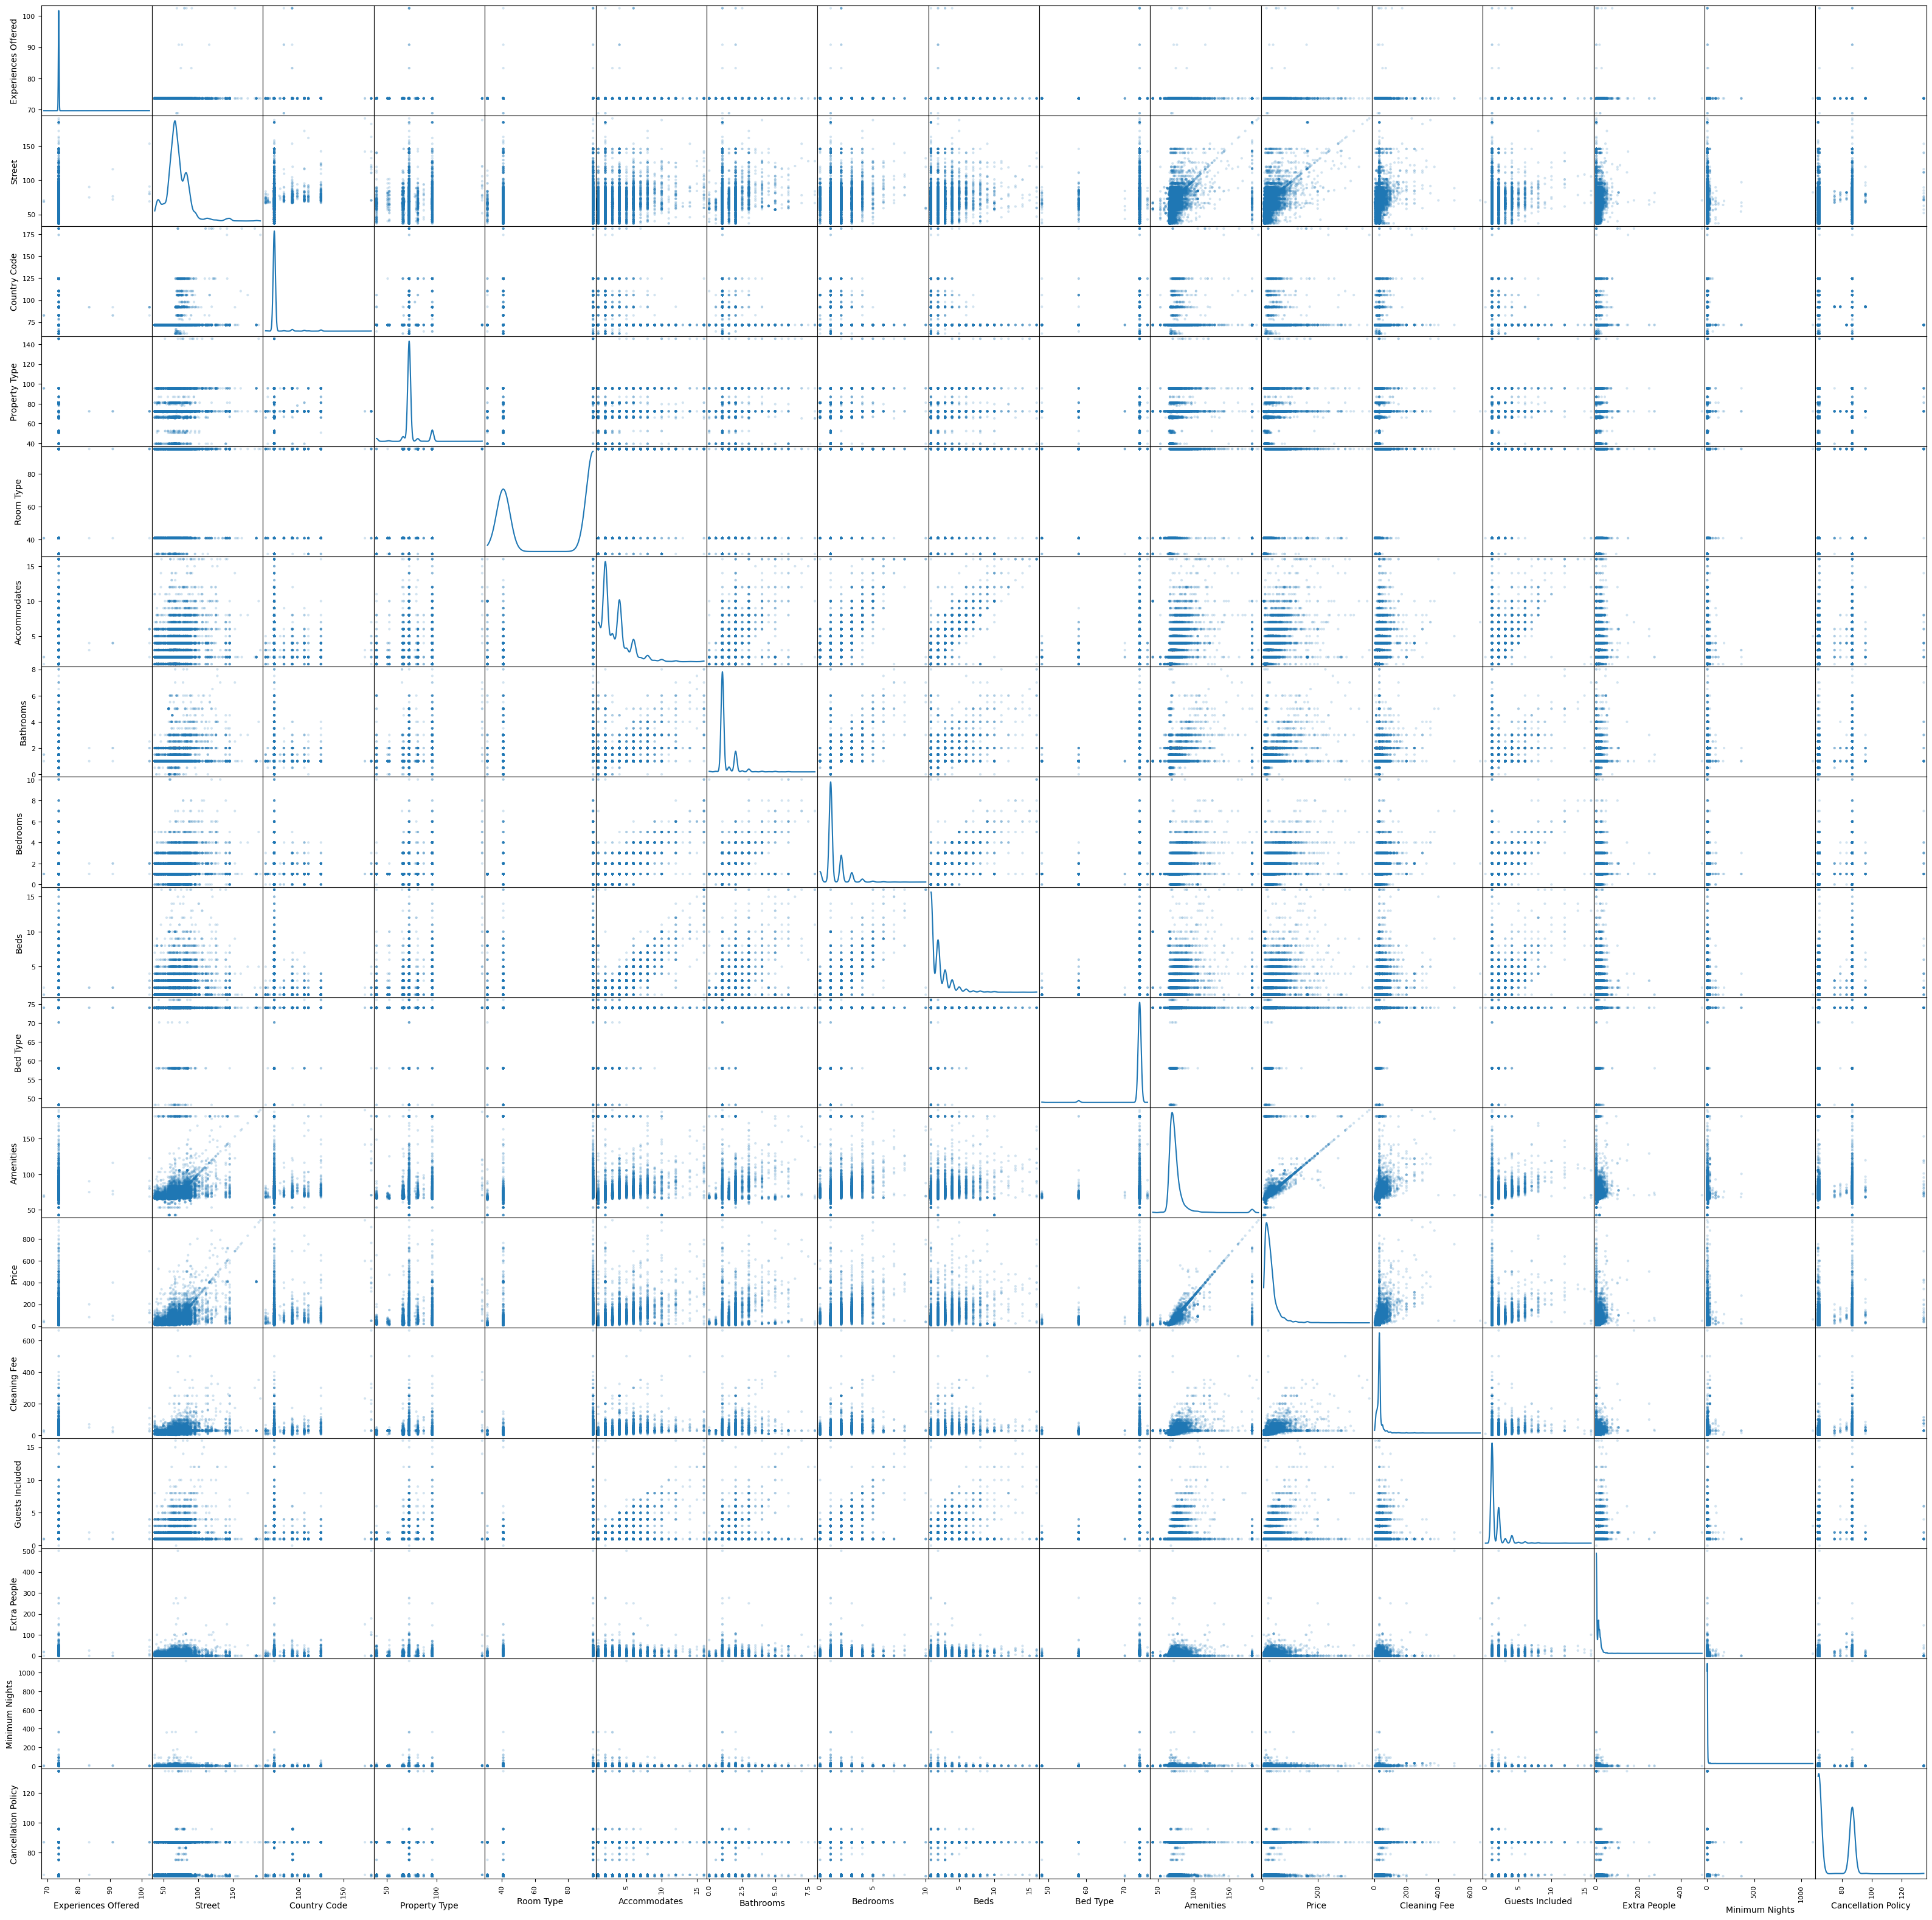

In [705]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(40, 40), diagonal = 'kde')
plt.show()

Podemos observar que Amenities tiene una fuerte tendencia con Price

# NOTES FOR MYSELF

pintar en un mapa coordenadas para visualizar
buscar relación amenities street

## Creación de nuevas variables

## Modelado

In [15]:
#### DATOS TRAIN

#Carga datos
data_train = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')

# Imputación variables numéricas
num_columns = data_train.select_dtypes(include=['float64', 'int64']).columns
for col in num_columns:
    mode_value = data_train[col].mode()[0]
    data_train[col].fillna(mode_value, inplace = True)

# Imputación variables categóricas
data_train['Amenities'].fillna(data_train['Amenities'].mode()[0], inplace=True)

# Eliminación de variables
data_train= data_train.drop('Country', axis=1)
data_train = data_train.drop(['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Smart Location', 
                  'Geolocation'], axis=1)
data_train = data_train.drop('Market', axis = 1)
data_train = data_train.drop(['Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Latitude',
       'Longitude', 'Maximum Nights', 'Calculated host listings count'], axis =1)

#Codificación variables categóricas con TargetEncoder
import pandas as pd
import category_encoders as ce
categorical_cols = ['Property Type', 'Room Type', 'Experiences Offered', 'Street', 'Country Code', 'Bed Type', 
                    'Amenities', 'Cancellation Policy']  
target_encoder = ce.TargetEncoder(cols=categorical_cols)
data_train[categorical_cols] = target_encoder.fit_transform(data_train[categorical_cols], data_train['Price'])

#Eliminación de outliers
data_train = data_train[data_train['Accommodates'] <= 10]
data_train = data_train[data_train['Bathrooms'] <= 3.5]
data_train = data_train[data_train['Bedrooms'] <= 6]
data_train = data_train[data_train['Beds'] <= 9]
data_train = data_train[(data_train['Guests Included'] <= 6) & (data_train['Guests Included'] > 0)]
data_train = data_train[data_train['Extra People'] <= 30]
data_train = data_train[data_train['Minimum Nights'] <= 30]
data_train = data_train[data_train['Cancellation Policy'] <= 90]


In [17]:
#### DATOS TEST

# Carga de datos
data_test = pd.read_csv('./dairbnb_test.csv', sep=';', decimal='.')

# Imputación variables numéricas
# Primero calculamos las modas de 'data' (el train_data) y las guardamos en un diccionario
mode_values = {}
num_columns = data_train.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    mode_values[col] = data_train[col].mode()[0]  # Guardamos la moda de cada columna numérica de train_data

# Ahora usamos estas modas para rellenar los valores nulos en 'data_test'
for col in num_columns:
    if col in data_test.columns:  # Verificamos que la columna exista también en el test_data
        data_test[col].fillna(mode_values[col], inplace=True)  # Rellenamos con la moda de train_data


# Imputación variables categóricas
data_test['Amenities'].fillna(data_train['Amenities'].mode()[0], inplace=True)

# Eliminación de variables
data_test= data_test.drop('Country', axis=1)
data_test = data_test.drop(['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Smart Location', 
                  'Geolocation'], axis=1)
data_test = data_test.drop('Market', axis = 1)
data_test = data_test.drop(['Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Latitude',
       'Longitude', 'Maximum Nights', 'Calculated host listings count'], axis =1)

#Codificación variables categóricas con TargetEncoder
import pandas as pd
import category_encoders as ce
categorical_cols = ['Property Type', 'Room Type', 'Experiences Offered', 'Street', 'Country Code', 'Bed Type', 
                    'Amenities', 'Cancellation Policy']  
target_encoder = ce.TargetEncoder(cols=categorical_cols)
data_test[categorical_cols] = target_encoder.fit_transform(data_test[categorical_cols], data_test['Price'])

#Eliminación de outliers
data_test = data_test[data_test['Accommodates'] <= 10]
data_test = data_test[data_test['Bathrooms'] <= 3.5]
data_test = data_test[data_test['Bedrooms'] <= 6]
data_test = data_test[data_test['Beds'] <= 9]
data_test = data_test[(data_test['Guests Included'] <= 6) & (data_test['Guests Included'] > 0)]
data_test = data_test[data_test['Extra People'] <= 30]
data_test = data_test[data_test['Minimum Nights'] <= 30]
data_test = data_test[data_test['Cancellation Policy'] <= 90]


In [757]:
data.shape

(11215, 17)

In [759]:
data_test.shape

(2820, 17)

In [749]:
data.columns

Index(['Experiences Offered', 'Street', 'Country Code', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Amenities', 'Price', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Cancellation Policy'],
      dtype='object')

## Preprocesamiento

In [19]:
from sklearn import preprocessing

# Dataset de train
data_train = data_train
y_train = data_train['Price'].values     # nos quedamos con la 1ª columna, price
X_train = data_train.drop(columns=['Price']).values     # nos quedamos con el resto

# Dataset de test
data_test = data_test
y_test = data_test['Price'].values     # nos quedamos con la 1ª columna, price
X_test = data_test.drop(columns=['Price']).values    # nos quedamos con el resto

In [21]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [23]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11215, 16)
Datos test:  (2820, 16)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

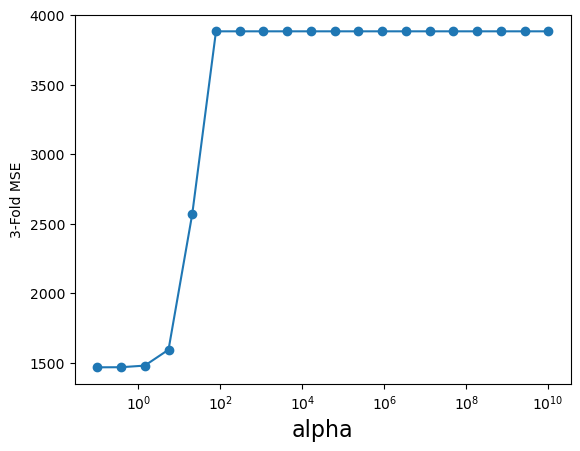

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = data_train.drop(columns=['Price']).columns # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.45e+03
MSE Modelo Lasso (test) : 1.17e+03
RMSE Modelo Lasso (train): 38.1
RMSE Modelo Lasso (test) : 34.2
Experiences Offered 0.14275621360744511
Street 14.594008641911365
Country Code 6.429729812349514
Property Type 0.5736164675601005
Room Type 7.718320980268153
Accommodates 9.179204675602398
Bathrooms 5.442016181456047
Bedrooms 5.876826121715929
Beds -0.7886902454699009
Bed Type 0.6354148519376877
Amenities 24.807761169044998
Cleaning Fee 10.410189341785623
Guests Included 0.0
Extra People -3.7509044965042446
Minimum Nights -1.2922635678826229
Cancellation Policy -0.8285003878604283


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mostramos el MSE promedio
print(f"Linear Regression MSE: {-scores.mean()}")


Linear Regression MSE: 1466.5536114500974


In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Random Forest MSE: {-rf_scores.mean()}")


Random Forest MSE: 438.5624339573399


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Gradient Boosting MSE: {-gb_scores.mean()}")


Gradient Boosting MSE: 421.0471336672837


In [36]:
# Entrenar el modelo Gradient Boosting con todo el conjunto de entrenamiento
gb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de test
y_pred = gb.predict(X_test)

# Calcular el MSE en el conjunto de test
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")


Test MSE: 905.8487295145684


In [38]:
from sklearn.model_selection import GridSearchCV

# Definimos el rango de parámetros que queremos probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializamos el modelo
gb = GradientBoostingRegressor()

# Buscamos los mejores hiperparámetros
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Ajustamos el modelo
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")

# Utilizamos el mejor modelo en el conjunto de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculamos el nuevo MSE en el conjunto de test
test_mse_tuned = mean_squared_error(y_test, y_pred)
print(f"Test MSE después de tunear: {test_mse_tuned}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Test MSE después de tunear: 745.8251042840425
